<a href="https://colab.research.google.com/github/therealcs1010/CS4248-Project/blob/main/Fatin/Fatin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Data and Preprocess**

In [8]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
def preprocess(text):
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if not w in set(stopwords.words("english"))]
    words = [WordNetLemmatizer().lemmatize(word) for word in words]
    return " ".join(words)

In [10]:
def get_data(file):
    data = pd.read_json(file)
    x_data = data['text'].apply(preprocess)
    y_data = data['label']
    return x_data, y_data

In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd
import numpy as np

Mounted at /content/drive


In [12]:
# x_train, y_train = get_data('/content/drive/MyDrive/train.json')
# x_test, y_test = get_data('/content/drive/MyDrive/test.json')

In [13]:
# x_train.to_csv('data/x_train.csv')
# x_test.to_csv('data/x_test.csv')
x_train = pd.read_csv('/content/drive/MyDrive/x_train.csv', index_col=False, header=0)['text']
x_test = pd.read_csv('/content/drive/MyDrive/x_test.csv', index_col=False, header=0)['text']
x_train

0        bromwell high cartoon comedy ran time program ...
1        homelessness houselessness george carlin state...
2        brilliant overacting lesley ann warren best dr...
3        easily underrated film inn brook cannon sure f...
4        typical mel brook film much le slapstick movie...
                               ...                        
24995    towards end movie felt technical felt like cla...
24996    kind movie enemy content watch time bloody tru...
24997    saw descent last night stockholm film festival...
24998    film pick pound turn rather good 23rd century ...
24999    one dumbest film ive ever seen rip nearly ever...
Name: text, Length: 25000, dtype: object

In [14]:
# y_train.to_csv('data/y_train.csv')
# y_test.to_csv('data/y_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/y_train.csv', index_col=False, header=0)['label']
y_test = pd.read_csv('/content/drive/MyDrive/y_test.csv', index_col=False, header=0)['label']
y_train.unique()

array(['+', '-'], dtype=object)

In [15]:
mapping = {'+': 1, '-': -1}
train_sentiment = y_train.replace(mapping)
test_sentiment = y_test.replace(mapping)
train_sentiment

0        1
1        1
2        1
3        1
4        1
        ..
24995   -1
24996   -1
24997   -1
24998   -1
24999   -1
Name: label, Length: 25000, dtype: int64

# **Get Vocabulary**

In [16]:
nltk.download('punkt')   
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
def get_sentences( review, tokenizer):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            words = preprocess(raw_sentence, string=False)
            sentences.append(words)
    return sentences

In [18]:
data = pd.read_json('/content/drive/MyDrive/train.json')
raw_x_train = data['text']
raw_y_train = data['label']
data = pd.read_json('/content/drive/MyDrive/test.json')
raw_x_test = data['text']
raw_y_test = data['label']

In [19]:
# sentences = []
# for review in raw_x_train:
#     sentences += get_sentences(review, tokenizer)
# sentences[0]

In [20]:
# df = pd.DataFrame(np.array(sentences))
# df.reset_index().to_json('/content/drive/MyDrive/sentences.json')
data_sentences = pd.read_json('/content/drive/MyDrive/sentences.json')
sentences = data_sentences['0']
sentences

0                         [bromwell, high, cartoon, comedy]
1               [ran, time, program, school, life, teacher]
2         [35, year, teaching, profession, lead, believe...
3         [scramble, survive, financially, insightful, s...
4         [saw, episode, student, repeatedly, tried, bur...
                                ...                        
270848                [one, dumbest, film, ive, ever, seen]
270849    [rip, nearly, ever, type, thriller, manages, m...
270850    [plot, afterthought, far, acting, go, there, n...
270851    [honestly, cant, understand, type, nonsense, g...
270852    [crap, like, people, downloading, illegally, t...
Name: 0, Length: 270853, dtype: object

In [21]:
idx = [ii for ii, sentence in enumerate(sentences) if (len(sentence) > 0)]
sentences = [sentences[ii] for ii in idx]

In [22]:
all_words = []
for sentence in sentences:
    all_words.extend(sentence)
len(all_words)

vocab = set()
for sentence in sentences:
    vocab.update(sentence)
len(vocab)

111534

# **Remove Outliers**

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

counts = Counter(all_words)
train_review_lens = Counter([len(x.split()) for x in x_train])
test_review_lens = Counter([len(x.split()) for x in x_test])

Text(0, 0.5, 'Number of reviews')

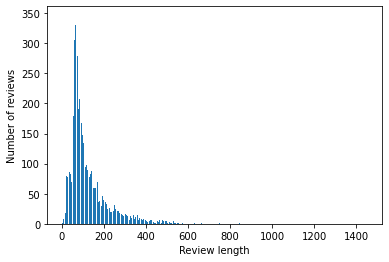

In [24]:
plt.bar(train_review_lens.keys(), train_review_lens.values())
plt.xlabel('Review length')
plt.ylabel('Number of reviews')

Text(0, 0.5, 'Number of reviews')

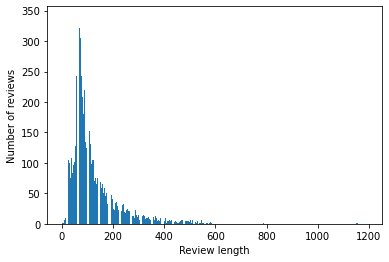

In [25]:
plt.bar(test_review_lens.keys(), test_review_lens.values())
plt.xlabel('Review length')
plt.ylabel('Number of reviews')

In [26]:
print('Number of training reviews before removing outliers: ', len(x_train))
idx = [ii for ii, review in enumerate(x_train) if (len(review.split()) > 0 and len(review.split()) < 200)]
x_train = [x_train[ii] for ii in idx]
train_sentiment = np.array([train_sentiment[ii] for ii in idx])
print('Number of training reviews after removing outliers: ', len(x_train))

Number of training reviews before removing outliers:  25000
Number of training reviews after removing outliers:  21146


In [27]:
print('Number of testing reviews before removing outliers: ', len(x_test))
idx = [ii for ii, review in enumerate(x_test) if (len(review.split()) > 0 and len(review.split()) < 200)]
x_test = [x_test[ii] for ii in idx]
test_sentiment = np.array([test_sentiment[ii] for ii in idx])
print('Number of testing reviews after removing outliers: ', len(x_test))

Number of testing reviews before removing outliers:  25000
Number of testing reviews after removing outliers:  21373


# **Feature Engineering with BoW and Tf-idf**

In [28]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
def get_bow(clean_train_text, clean_test_text):
    vectorizer = CountVectorizer(analyzer = "word", max_features = 10000) 
    train_bow = vectorizer.fit_transform(clean_train_text).toarray()
    test_bow = vectorizer.transform(clean_test_text).toarray()
    return train_bow, test_bow

In [30]:
def get_tfidf(clean_train_text, clean_test_text):
    vectorizer = TfidfVectorizer(analyzer = "word", max_features = 10000) 
    train_tfidf = vectorizer.fit_transform(clean_train_text).toarray()
    test_tfidf = vectorizer.transform(clean_test_text).toarray()
    return train_tfidf, test_tfidf

In [31]:
train_bow, test_bow = get_bow(x_train, x_test)
train_tfidf, test_tfidf = get_tfidf(x_train, x_test)
train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Feature Engineering with Word2Vec (Average Vectors)**

Referenced from https://github.com/wendykan/DeepLearningMovies

In [27]:
from gensim.models import Word2Vec

In [28]:
num_features = 300    
min_word_count = 40   
num_workers = 4       
context = 10          
downsampling = 1e-3   

word2vec_model = Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, seed=1)

word2vec_model.init_sims(replace=True)

In [29]:
def makeFeatureVec(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0
    index2word_set = set(model.wv.index2word)
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [30]:
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [31]:
clean_train_reviews = [review.split() for review in x_train]
clean_test_reviews = [review.split() for review in x_test]

In [32]:
train_vectors = getAvgFeatureVecs(clean_train_reviews, word2vec_model, num_features)
test_vectors = getAvgFeatureVecs(clean_test_reviews, word2vec_model, num_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [33]:
model_name = "/content/drive/MyDrive/300features_40minwords_10context"
word2vec_model.save(model_name)

In [34]:
word2vec_model = Word2Vec.load("/content/drive/MyDrive/300features_40minwords_10context")
word_vectors = word2vec_model.wv.syn0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


# **Feature Engineering with Word2Vec (Bag of Centroids)**

Referenced from https://github.com/wendykan/DeepLearningMovies

In [35]:
from sklearn.cluster import KMeans

num_clusters = int(word_vectors.shape[0] / 5)
kmeans_clustering = KMeans(n_clusters = num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)
word_centroid_map = dict(zip(word2vec_model.wv.index2word, idx))

In [36]:
def create_bag_of_centroids( wordlist, word_centroid_map ):
    num_centroids = max( word_centroid_map.values() ) + 1
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    for word in wordlist:
        if word in word_centroid_map:
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    return bag_of_centroids

In [37]:
train_centroids = np.zeros((len(x_train), num_clusters), \
    dtype="float32" )
test_centroids = np.zeros((len(x_test), num_clusters), \
    dtype="float32" )

In [38]:
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1
counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

# **Pre-Trained Word2Vec**

Referenced from https://github.com/cezannec/CNN_Text_Classification

In [ ]:
from gensim.models import KeyedVectors

embed_lookup = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300-SLIM.bin', 
                                                 binary=True)
pretrained_words = []
for word in embed_lookup.vocab:
    pretrained_words.append(word)

In [ ]:
def tokenize_all_reviews(embed_lookup, reviews):
    reviews_words = [review.split() for review in reviews]
    tokenized_reviews = []
    for review in reviews_words:
        ints = []
        for word in review:
            try:
                idx = embed_lookup.vocab[word].index
            except: 
                idx = 0
            ints.append(idx)
        tokenized_reviews.append(ints)
    
    return tokenized_reviews

In [ ]:
tokenized_reviews_train = tokenize_all_reviews(embed_lookup, x_train)
tokenized_reviews_test = tokenize_all_reviews(embed_lookup, x_test)

In [ ]:
def pad_features(tokenized_reviews, seq_length):
    features = np.zeros((len(tokenized_reviews), seq_length), dtype=int)
    for i, row in enumerate(tokenized_reviews):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [ ]:
seq_length = 200
train_google_features = pad_features(tokenized_reviews_train, seq_length=seq_length)
test_google_features = pad_features(tokenized_reviews_test, seq_length=seq_length)

# **Get Metrics and Plots**

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score, f1_score

In [33]:
def get_metrics(y_test, preds):
    accuracy = accuracy_score(y_test, preds)
    print('Accuracy:', accuracy)
    f1 = f1_score(y_test, preds)
    print('F1 Score:', f1)

In [34]:
def get_plot(y_test, preds, title, file):
    fpr, tpr, _ = roc_curve(y_test, preds)
    plt.plot(fpr, tpr)
    plt.title(title)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.savefig('plots/' + file + '.png')
    plt.show()

# **Benchmarking Feature Engineering Methods**

In [56]:
model = BernoulliNB()
model.fit(train_bow, train_sentiment)
preds = model.predict(test_bow)
get_metrics(test_sentiment, preds)

Accuracy: 0.8573433771580966
F1 Score: 0.8555044784607364


In [55]:
model = BernoulliNB()
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

Accuracy: 0.8573433771580966
F1 Score: 0.8555044784607364


In [ ]:
model = BernoulliNB()
model.fit(train_vectors, train_sentiment)
preds = model.predict(test_vectors)
get_metrics(test_sentiment, preds)

Accuracy: 0.6912927525382492
F1 Score: 0.6715452011150935


In [48]:
model = BernoulliNB()
model.fit(train_centroids, train_sentiment)
preds = model.predict(test_centroids)
get_metrics(test_sentiment, preds)

Accuracy: 0.8216909184485098
F1 Score: 0.8219408494136335


In [ ]:
model = BernoulliNB()
model.fit(train_google_features, train_sentiment)
preds = model.predict(test_google_features)
get_metrics(test_sentiment, preds)

Accuracy: 0.5221073316801572
F1 Score: 0.46162766181741516


# **Get Results from models (Naive Bayes)**

In [27]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

In [28]:
model = GaussianNB()
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Gaussian Naive Bayes (with Tf-idf)', 'gaussian_nb_tfidf')        

NameError: ignored

In [ ]:
model = MultinomialNB()
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Multinomial Naive Bayes (with Tf-idf)', 'multinomial_nb_tfidf')

In [ ]:
model = BernoulliNB()
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Bernoulli Naive Bayes (with Tf-idf)', 'bernoulli_nb_tfidf')

# **Get Results from models (Decision Trees and Random Forest)**

In [35]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier, HistGradientBoostingClassifier

Accuracy: 0.7157160903944229
F1 Score: 0.7119286933434478


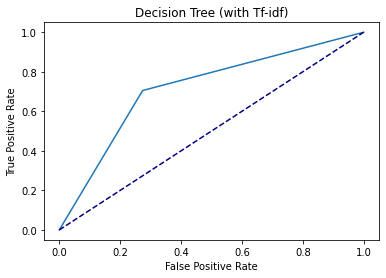

In [37]:
model = DecisionTreeClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Decision Tree (with Tf-idf)', 'decision_tree_tfidf')

Accuracy: 0.6544238057362093
F1 Score: 0.6471431301356774


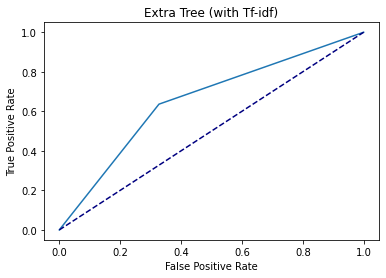

In [38]:
model = ExtraTreeClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Extra Tree (with Tf-idf)', 'extra_tree_tfidf')

Accuracy: 0.8473307443971366
F1 Score: 0.8436586651334386


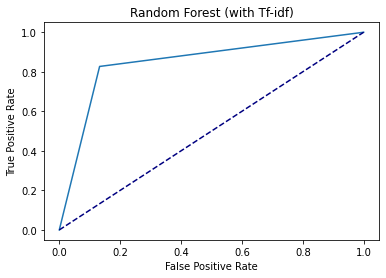

In [39]:
model = RandomForestClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Random Forest (with Tf-idf)', 'random_forest_tfidf')        

Accuracy: 0.8022271089692603
F1 Score: 0.8094143108345732


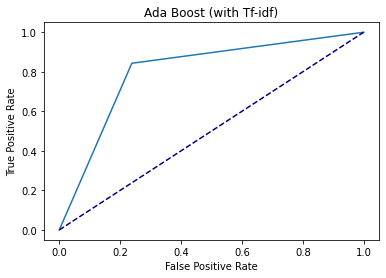

In [40]:
model = AdaBoostClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Ada Boost (with Tf-idf)', 'ada_boost_tfidf')    

Accuracy: 0.7799092312731015
F1 Score: 0.7691175026995191


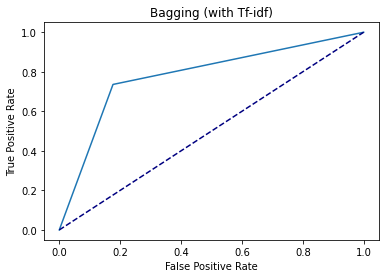

In [41]:
model = BaggingClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Bagging (with Tf-idf)', 'bagging_tfidf')    

Accuracy: 0.8635661816310298
F1 Score: 0.8595375722543352


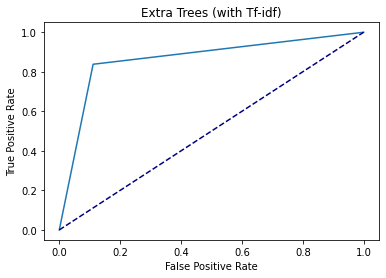

In [42]:
model = ExtraTreesClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Extra Trees (with Tf-idf)', 'extra_trees_tfidf')    

Accuracy: 0.812380105740888
F1 Score: 0.8209021884769987


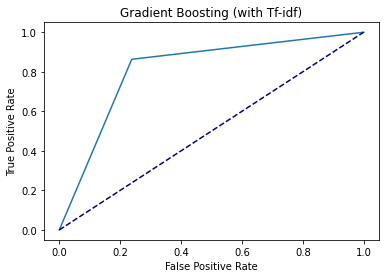

In [43]:
model = GradientBoostingClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Gradient Boosting (with Tf-idf)', 'gradient_boosting_tfidf')    

Accuracy: 0.8599167173536705
F1 Score: 0.8605366126327558


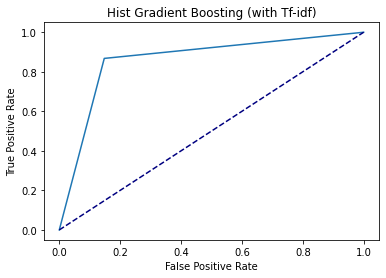

In [46]:
model = HistGradientBoostingClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Hist Gradient Boosting (with Tf-idf)', 'hist_gradient_boosting_tfidf')    

# **Get Results from models (Linear)**

In [26]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDClassifier

Accuracy: 0.8798484068684789
F1 Score: 0.8795384182381086


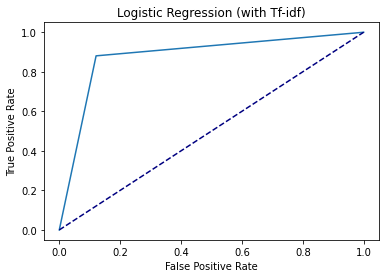

In [31]:
model = LogisticRegression(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Logistic Regression (with Tf-idf)', 'logistic_regression_tfidf')          

Accuracy: 0.8307677911383521
F1 Score: 0.8270453784727204


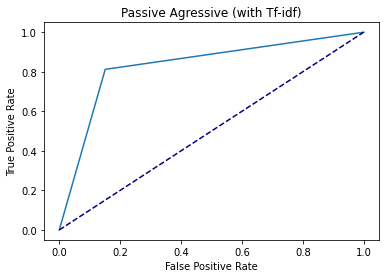

In [32]:
model = PassiveAggressiveClassifier(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Passive Agressive (with Tf-idf)', 'passive_aggressive_tfidf') 

Accuracy: 0.8365227155757264
F1 Score: 0.8336507331936774


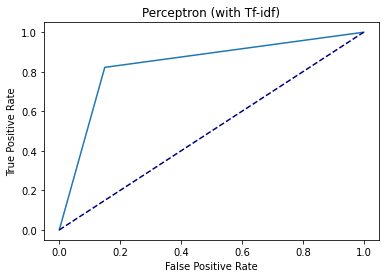

In [33]:
model = Perceptron(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Perceptron (with Tf-idf)', 'perceptron_tfidf') 

In [ ]:
model = RidgeClassifier(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Ridge Classifier (with Tf-idf)', 'ridge_classifier_tfidf') 

Accuracy: 0.8774154306835728
F1 Score: 0.8766942771084336


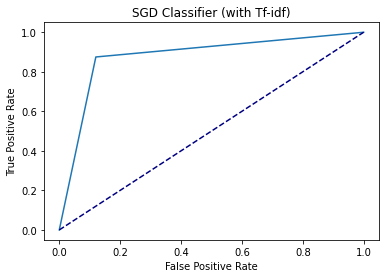

In [32]:
model = SGDClassifier(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'SGD Classifier (with Tf-idf)', 'sgd_classifier_tfidf') 

# **Get Results from models (NN)**

In [ ]:
from sklearn.neural_network import MLPClassifier

Accuracy: 0.84784
F1 Score: 0.8450635386119257


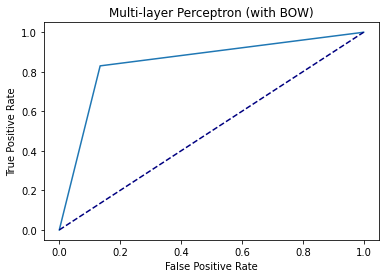

In [ ]:
model = MLPClassifier(random_state=4248, max_iter=4248)
model.fit(train_bow, train_sentiment)
preds = model.predict(test_bow)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Multi-layer Perceptron (with BOW)', 'multi_layer_perceptron_bow')          

Accuracy: 0.829
F1 Score: 0.8253747804419753


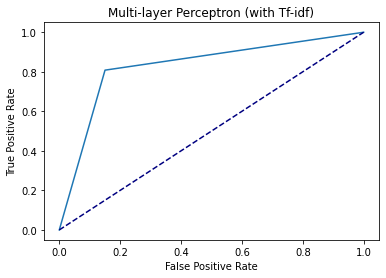

In [ ]:
model = MLPClassifier(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Multi-layer Perceptron (with Tf-idf)', 'multi_layer_perceptron_tfidf')

In [ ]:
from sklearn.model_selection import train_test_split
train_google_features, val_google_features, train_sentiment, val_sentiment = train_test_split(
                                          train_google_features, train_sentiment, test_size=0.2, random_state=4248)

Referenced from https://github.com/cezannec/CNN_Text_Classification

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(torch.from_numpy(train_google_features), torch.from_numpy(train_sentiment))
val_data = TensorDataset(torch.from_numpy(val_google_features), torch.from_numpy(val_sentiment))
test_data = TensorDataset(torch.from_numpy(test_google_features), torch.from_numpy(test_sentiment))

batch_size = 50
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentCNN(nn.Module):
    def __init__(self, embed_model, vocab_size, output_size, embedding_dim,
                 num_filters=100, kernel_sizes=[3, 4, 5], freeze_embeddings=True, drop_prob=0.5):
        super(SentimentCNN, self).__init__()
        self.num_filters = num_filters
        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.from_numpy(embed_model.vectors)) # all vectors
        
        if freeze_embeddings:
            self.embedding.requires_grad = False
        
        self.convs_1d = nn.ModuleList([
            nn.Conv2d(1, num_filters, (k, embedding_dim), padding=(k-2,0)) 
            for k in kernel_sizes])
        
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, output_size) 
        self.dropout = nn.Dropout(drop_prob)
        self.sig = nn.Sigmoid()
        
    
    def conv_and_pool(self, x, conv):
        x = F.relu(conv(x)).squeeze(3)
        x_max = F.max_pool1d(x, x.size(2)).squeeze(2)
        return x_max

    def forward(self, x):
        embeds = self.embedding(x) 
        embeds = embeds.unsqueeze(1)
        conv_results = [self.conv_and_pool(embeds, conv) for conv in self.convs_1d]
        x = torch.cat(conv_results, 1)
        x = self.dropout(x)
        logit = self.fc(x) 
        return self.sig(logit)

In [ ]:
vocab_size = len(pretrained_words)
output_size = 1 
embedding_dim = len(embed_lookup[pretrained_words[0]]) 
num_filters = 100
kernel_sizes = [3, 4, 5]

net = SentimentCNN(embed_lookup, vocab_size, output_size, embedding_dim,
                   num_filters, kernel_sizes)
net

SentimentCNN(
  (embedding): Embedding(3000000, 300)
  (convs_1d): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 300), stride=(1, 1), padding=(1, 0))
    (1): Conv2d(1, 100, kernel_size=(4, 300), stride=(1, 1), padding=(2, 0))
    (2): Conv2d(1, 100, kernel_size=(5, 300), stride=(1, 1), padding=(3, 0))
  )
  (fc): Linear(in_features=300, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (sig): Sigmoid()
)

In [ ]:
lr=0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
def train(net, train_loader, epochs, print_every=100):
    counter = 0 
    net.train()

    for e in range(epochs):
        for inputs, labels in train_loader:
            counter += 1
            net.zero_grad()
            output = net(inputs)
            loss = criterion(output.squeeze(), labels.float())
            loss.backward()
            optimizer.step()

            if counter % print_every == 0:
                val_losses = []
                net.eval()

                for inputs, labels in val_loader:
                    output = net(inputs)
                    val_loss = criterion(output.squeeze(), labels.float())
                    val_losses.append(val_loss.item())

                net.train()
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))

In [ ]:
epochs = 10
print_every = 100
train(net, train_loader, epochs, print_every=print_every)

In [ ]:
test_losses = [] 
num_correct = 0
net.eval()
for inputs, labels in test_loader:
    output = net(inputs)
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    pred = torch.round(output.squeeze()) 
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

print("Test loss: {:.3f}".format(np.mean(test_losses)))
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

# **Testing with self-generated reviews**

In [ ]:
model = LogisticRegression(random_state=4248, max_iter=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)

Accuracy: 0.8798484068684789
F1 Score: 0.8795384182381086


In [ ]:
test_review_neg = "In the Name of the King: A Dungeon Siege Tale is yet another video game turned film by Uwe Boll. The cast is actually pretty good, and features Jason Statham, Ron Perlman, Leelee Sobieski, Claire Forlani, and Ray Liotta; but their performances are bland and lifeless. The only thing worst are the special effects, which are atrocious. And the score is mundane, capturing none of the adventure or wonder of a fantasy film. Cheaply made and uninspired, In the Name of the King: A Dungeon Siege Tale is a dreadful piece of garbage."
test_review_pos = "This movie lived up to its hype. It's possibly one of the best films of its kind, and I especially liked the development of all the characters. The villain isn't just a villain. I understood him. Like all Marvel films, the visual and aural elements are excellent. Acting and writing are top notch here as well. This film is a bit more serious than most Marvel films, which works in its favor."
test_review_neg = preprocess(test_review_neg)
test_review_pos = preprocess(test_review_pos)

In [ ]:
vectorizer = TfidfVectorizer(analyzer = "word", max_features = 10000) 
vectorizer.fit_transform(x_train).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
neg_tfidf = vectorizer.transform([test_review_neg])
pos_tfidf = vectorizer.transform([test_review_pos])

In [ ]:
model.predict(neg_tfidf)

array([-1])

In [ ]:
model.predict(pos_tfidf)

array([1])

# **Ensembling Models Together**

In [44]:
model = StackingClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Stacking (with Tf-idf)', 'stacking_tfidf')    

TypeError: ignored

In [47]:
model = VotingClassifier(random_state=4248)
model.fit(train_tfidf, train_sentiment)
preds = model.predict(test_tfidf)
get_metrics(test_sentiment, preds)
get_plot(test_sentiment, preds, 'Voting (with Tf-idf)', 'voting_tfidf')    

TypeError: ignored